##What's wrong with our data?

In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 98 kB 3.4 MB/s 


In [ ]:
from google.colab import drive
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import random
import keras_tuner as kt

In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Introduction to Deep Learning/Exercise 11/cifar_attempts')
os.getcwd()

Mounted at /content/drive


'/content/drive/My Drive/Introduction to Deep Learning/Exercise 11/cifar_attempts'

# Dataset Fixes

In [ ]:
def get_data(dataset_number):
  with open("data{}.npz".format(dataset_number), "rb") as f:
    loaded_data = np.load(f)
    data = {}
    data["train_imgs"] = loaded_data['train_imgs']
    data["train_lbls"] = loaded_data['train_lbls']
    data["val_imgs"] = loaded_data['val_imgs']
    data["val_lbls"] = loaded_data['val_lbls']
    data["test_imgs"] = loaded_data['test_imgs']
    data["test_lbls"] = loaded_data['test_lbls']
    return data

In [ ]:
def create_model(img_height=32, img_width=32, channels=3, num_classes=10):
  model = tf.keras.Sequential(
      [layers.InputLayer(input_shape=(img_height, img_width, channels)),
      layers.Conv2D(16, 5, padding='same', activation='relu'),
      layers.MaxPooling2D(padding='same'),
      layers.Conv2D(32, 5, padding='same', activation='relu'),
      layers.MaxPooling2D(padding='same'),
      layers.Conv2D(64, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(padding='same'),
      layers.Conv2D(64, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(padding='same'),
      layers.Conv2D(64, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(padding='same'),
      layers.Conv2D(64, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(padding='same'),
      layers.Flatten(),
      layers.Dense(512, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(num_classes)     
      ]
  )

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [ ]:
def run_model(data, epochs=20, batch_size=64):
  model = create_model()
  model.fit(x=data["train_imgs"], y=data["train_lbls"], validation_data=(data["val_imgs"], data["val_lbls"]), epochs=epochs, batch_size=batch_size)
  model.evaluate(x=data["test_imgs"], y=data["test_lbls"], batch_size=batch_size)

In [ ]:
def plot_label_distribution(data):
  plt.rcParams['figure.figsize'] = [15, 5]
  plt.subplot(1,3,1)
  plt.hist(data["train_lbls"], bins=np.arange(11)-0.5, rwidth=0.9)
  plt.title("Train Labels")
  plt.subplot(1,3,2)
  plt.hist(data["val_lbls"], bins=np.arange(11)-0.5, rwidth=0.9)
  plt.title("Val Labels")
  plt.subplot(1,3,3)
  plt.hist(data["test_lbls"], bins=np.arange(11)-0.5, rwidth=0.9)
  plt.title("Test Labels")
  plt.show()

def plot_images_distribution(data):
  plt.rcParams['figure.figsize'] = [15, 5]
  plt.subplot(1,3,1)
  plt.hist(data["train_imgs"].reshape(-1))
  plt.title("Train Images")
  plt.subplot(1,3,2)
  plt.hist(data["val_imgs"].reshape(-1))
  plt.title("Val Images")
  plt.subplot(1,3,3)
  plt.hist(data["test_imgs"].reshape(-1))
  plt.title("Test Images")
  plt.show()

def print_dataset_numbers(data):
  print("Train Examples: {}\nVal Examples: {}\nTest Examples: {}".format(data["train_lbls"].shape[0], data["val_lbls"].shape[0], data["test_lbls"].shape[0]))
  print("Are all 50000 train examples used? {}".format(data["train_lbls"].shape[0] + data["val_lbls"].shape[0] >= 50000))
  print("Were there more than 50000 train examples used? {}".format(data["train_lbls"].shape[0] + data["val_lbls"].shape[0] > 50000))
  print("Are all 10000 test examples used? {}".format(data["test_lbls"].shape[0] == 10000))
  train_split = data["train_lbls"].shape[0] / (data["train_lbls"].shape[0] + data["val_lbls"].shape[0])
  val_split = data["val_lbls"].shape[0] / (data["train_lbls"].shape[0] + data["val_lbls"].shape[0])
  print("Train Split: {}, Val Split: {}".format(train_split, val_split))

def print_images_with_labels(data, n=5):
  data_parts = [("train_imgs", "train_lbls"), ("val_imgs", "val_lbls"), ("test_imgs", "test_lbls")]
  class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  for data_part in data_parts:
    for i in range(n):
      im_num = random.randint(0, data[data_part[0]].shape[0])
      plt.subplot(1,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(data[data_part[0]][im_num])
      plt.xlabel(class_names[data[data_part[1]][im_num]])
      if i == 2:
        plt.title(data_part[0])
    plt.show()

def count_doublicates(dataset1, dataset2):
  num_doublicates = 0
  for i in range(dataset1.shape[0]):
    for j in range(i+1, dataset2.shape[0]):
      if np.all(dataset1[i] == dataset2[j]):
        num_doublicates += 1
  return doublicates

def print_doublicates(data):
  print("Doublicates in the train set: " + count_doublicates(data["train_imgs"], data["train_imgs"]))
  print("Doublicates in the val set: " + count_doublicates(data["val_imgs"], data["val_imgs"]))
  print("Doublicates in the test set: " + count_doublicates(data["test_imgs"], data["test_imgs"]))

def print_disjunction(data):
  print("Disjunction between train set and val set" + count_doublicates(data["train_imgs"], data["val_imgs"]))
  print("Disjunction between train set and test set" + count_doublicates(data["train_imgs"], data["test_imgs"]))
  print("Disjunction between val set and test set" + count_doublicates(data["val_imgs"], data["test_imgs"]))



1. Do the labels match the examples?
2. Do the train, validation and test sets follow the same distribution?
3. Are the different subsets disjunct?
4. Are the sets balanced?
5. Where the sets processed in the same way?

* plot_label_distribution -> 2, 4
* plot_images_distribution -> 2
* print_dataset_numbers -> 3
* print_images_with_labels -> 1, 5
* intra_doublicates -> 4
* inter_doublicates -> 3



## Cifar 10

In [ ]:
cifar_data = {}
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

y_train.astype("int")
y_test.astype("int")

x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

cifar_data["train_imgs"] = x_train
cifar_data["train_lbls"] = y_train
cifar_data["val_imgs"] = x_val
cifar_data["val_lbls"] = y_val
cifar_data["test_imgs"] = x_test
cifar_data["test_lbls"] = y_test

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
model = create_model()
run_model(cifar_data)

Epoch 1/20
625/625 [==============================] - 12s 18ms/step - loss: 1.8180 - accuracy: 0.2876 - val_loss: 1.5912 - val_accuracy: 0.3934
Epoch 2/20
625/625 [==============================] - 11s 17ms/step - loss: 1.4607 - accuracy: 0.4479 - val_loss: 1.2965 - val_accuracy: 0.5198
Epoch 3/20
625/625 [==============================] - 10s 17ms/step - loss: 1.2380 - accuracy: 0.5460 - val_loss: 1.1791 - val_accuracy: 0.5751
Epoch 4/20
625/625 [==============================] - 10s 16ms/step - loss: 1.1014 - accuracy: 0.6034 - val_loss: 1.1510 - val_accuracy: 0.5967
Epoch 5/20
625/625 [==============================] - 10s 15ms/step - loss: 1.0033 - accuracy: 0.6401 - val_loss: 1.0751 - val_accuracy: 0.6214
Epoch 6/20
625/625 [==============================] - 10s 16ms/step - loss: 0.9120 - accuracy: 0.6754 - val_loss: 1.0379 - val_accuracy: 0.6409
Epoch 7/20
625/625 [==============================] - 10s 16ms/step - loss: 0.8424 - accuracy: 0.7024 - val_loss: 1.1349 - val_accuracy:

In [ ]:
print_dataset_numbers(cifar_data)

Train Examples: 40000
Val Examples: 10000
Test Examples: 10000
Are all 50000 train examples used? True
Were there more than 50000 train examples used? False
Are all 10000 test examples used? True
Train Split: 0.8, Val Split: 0.2


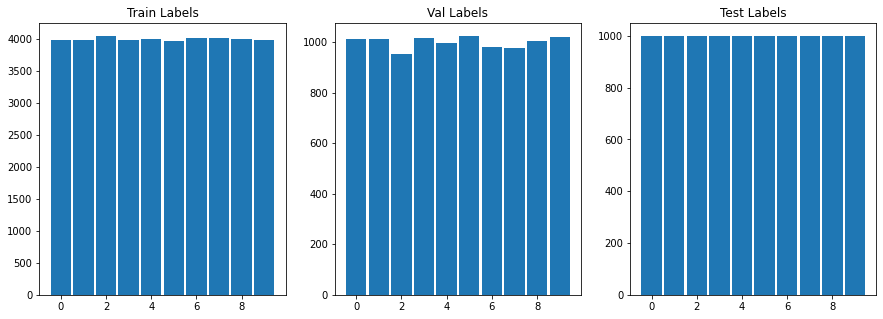

In [ ]:
plot_label_distribution(cifar_data)

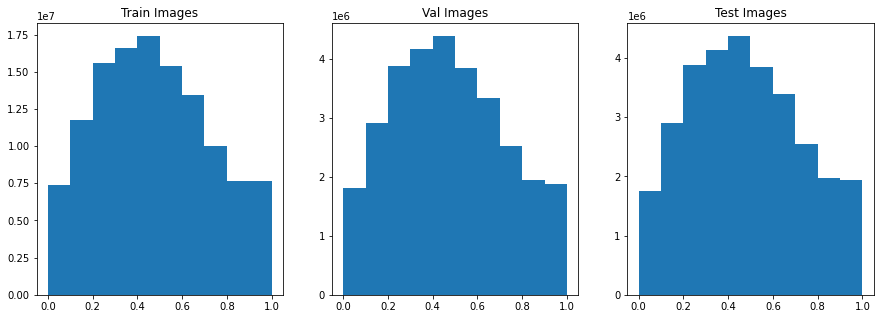

In [ ]:
plot_images_distribution(cifar_data)

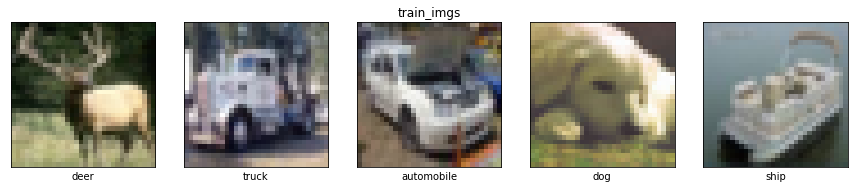

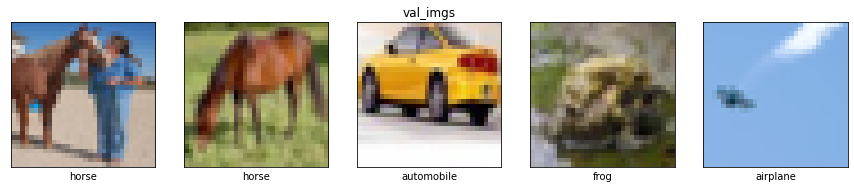

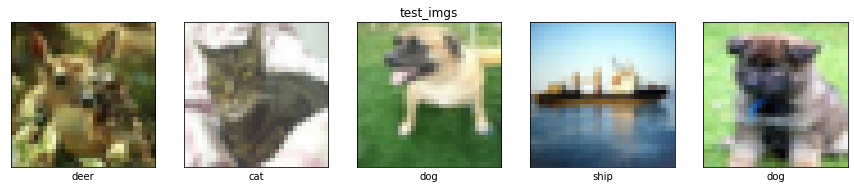

In [ ]:
print_images_with_labels(cifar_data)

## Data 1

In [ ]:
data1 = get_data(1)

In [ ]:
run_model(data1)

Epoch 1/20
563/563 [==============================] - 16s 9ms/step - loss: 1.6743 - accuracy: 0.3160 - val_loss: 1.3693 - val_accuracy: 0.4635
Epoch 2/20
563/563 [==============================] - 5s 8ms/step - loss: 1.2409 - accuracy: 0.5185 - val_loss: 1.1352 - val_accuracy: 0.5678
Epoch 3/20
563/563 [==============================] - 5s 8ms/step - loss: 1.0746 - accuracy: 0.5990 - val_loss: 0.9969 - val_accuracy: 0.6446
Epoch 4/20
563/563 [==============================] - 4s 8ms/step - loss: 0.9613 - accuracy: 0.6494 - val_loss: 0.8997 - val_accuracy: 0.6764
Epoch 5/20
563/563 [==============================] - 4s 8ms/step - loss: 0.8526 - accuracy: 0.6917 - val_loss: 0.8778 - val_accuracy: 0.6954
Epoch 6/20
563/563 [==============================] - 5s 9ms/step - loss: 0.7686 - accuracy: 0.7278 - val_loss: 0.8013 - val_accuracy: 0.7260
Epoch 7/20
563/563 [==============================] - 5s 8ms/step - loss: 0.6932 - accuracy: 0.7560 - val_loss: 0.8659 - val_accuracy: 0.7070
Epoch

In [ ]:
print_dataset_numbers(data1)

Train Examples: 36004
Val Examples: 3996
Test Examples: 10000
Are all 50000 train examples used? False
Were there more than 50000 train examples used? False
Are all 10000 test examples used? True
Train Split: 0.9001, Val Split: 0.0999


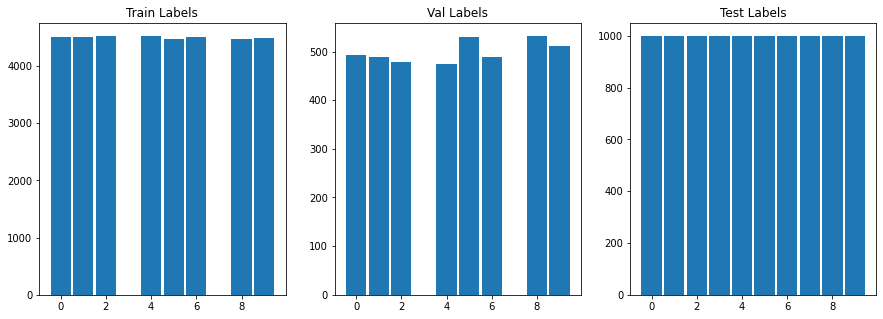

In [ ]:
plot_label_distribution(data1)

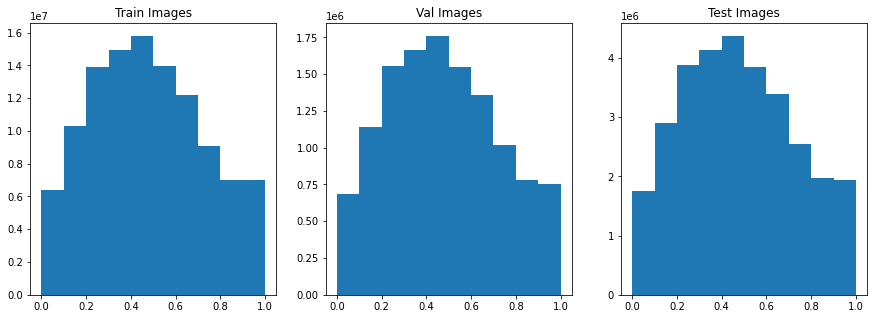

In [ ]:
plot_images_distribution(data1)

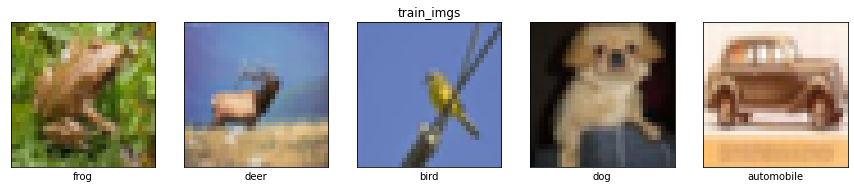

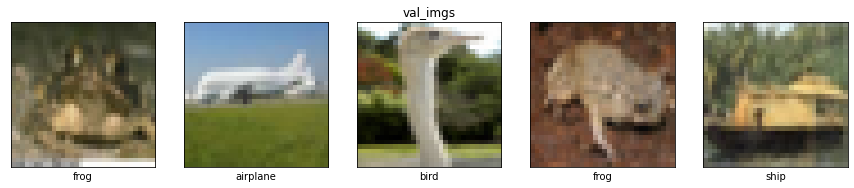

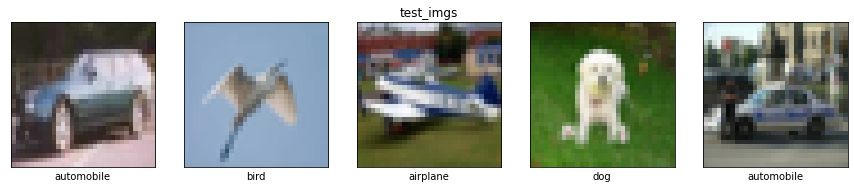

In [ ]:
print_images_with_labels(data1)

Train and val set miss examples 3 and 7, because of this the test accuracy is worse than the train and val accuracy.  
The solution is added examples of this classes to the train and val set.  
This dataset represents problems, where the train and val set are a sample, which misses examples of some classes and therefore the model can't learn them.

## Data 2

In [ ]:
data2 = get_data(2)

In [ ]:
run_model(2)

Epoch 1/20
782/782 [==============================] - 8s 9ms/step - loss: 1.7391 - accuracy: 0.3276 - val_loss: 1.3746 - val_accuracy: 0.4964
Epoch 2/20
782/782 [==============================] - 6s 8ms/step - loss: 1.3272 - accuracy: 0.5102 - val_loss: 1.1758 - val_accuracy: 0.5672
Epoch 3/20
782/782 [==============================] - 6s 8ms/step - loss: 1.1681 - accuracy: 0.5775 - val_loss: 1.0093 - val_accuracy: 0.6350
Epoch 4/20
782/782 [==============================] - 6s 8ms/step - loss: 1.0487 - accuracy: 0.6231 - val_loss: 0.8905 - val_accuracy: 0.6804
Epoch 5/20
782/782 [==============================] - 6s 8ms/step - loss: 0.9588 - accuracy: 0.6574 - val_loss: 0.8249 - val_accuracy: 0.7028
Epoch 6/20
782/782 [==============================] - 6s 8ms/step - loss: 0.8877 - accuracy: 0.6845 - val_loss: 0.7757 - val_accuracy: 0.7188
Epoch 7/20
782/782 [==============================] - 6s 8ms/step - loss: 0.8159 - accuracy: 0.7133 - val_loss: 0.7131 - val_accuracy: 0.7496
Epoch 

In [ ]:
print_dataset_numbers(data2)

Train Examples: 50000
Val Examples: 5000
Test Examples: 10000
Are all 50000 train examples used? True
Were there more than 50000 train examples used? True
Are all 10000 test examples used? True
Train Split: 0.9090909090909091, Val Split: 0.09090909090909091


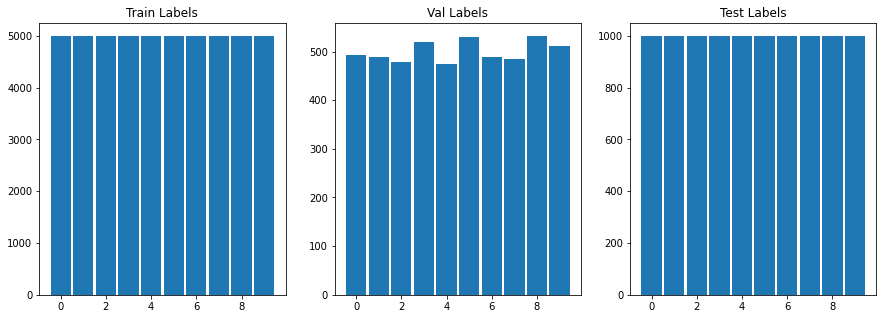

In [ ]:
plot_label_distribution(data2)

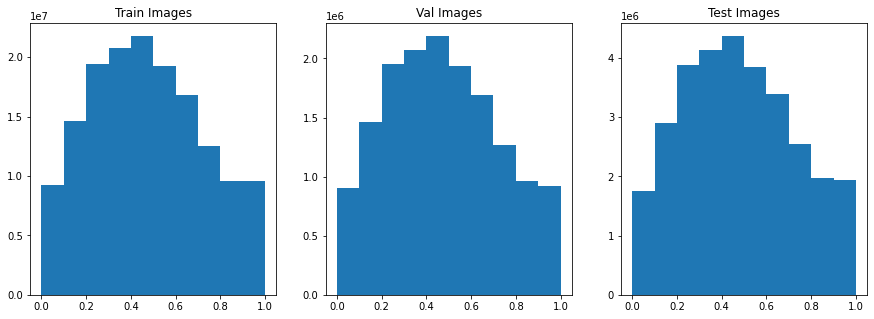

In [ ]:
plot_images_distribution(data2)

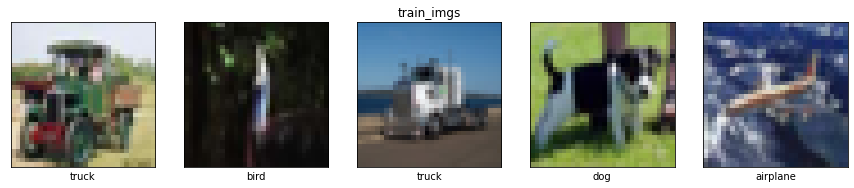

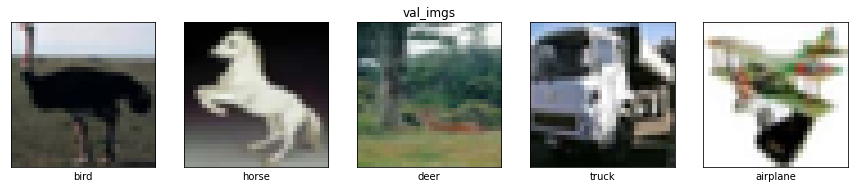

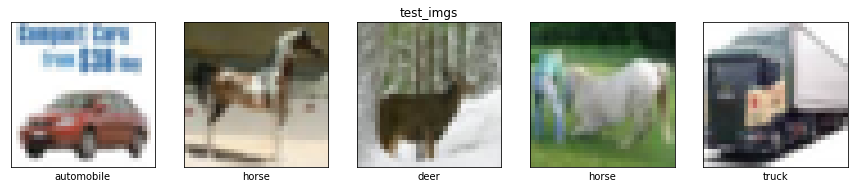

In [ ]:
print_images_with_labels(data2)

The val set is not disjunct with the train set. The val set is better than usual, train and test accuracy are usual.  
The solution is to remove the val examples from the train set.  
This dataset represents problems, where the train and validation and even test set overlap.

## Data 3

In [ ]:
data3 = get_data(3)

In [ ]:
run_model(data3)

Epoch 1/20
704/704 [==============================] - 7s 9ms/step - loss: 1.7828 - accuracy: 0.3104 - val_loss: 1.5029 - val_accuracy: 0.4310
Epoch 2/20
704/704 [==============================] - 6s 8ms/step - loss: 1.3855 - accuracy: 0.4862 - val_loss: 1.2728 - val_accuracy: 0.5410
Epoch 3/20
704/704 [==============================] - 6s 8ms/step - loss: 1.2087 - accuracy: 0.5595 - val_loss: 1.1794 - val_accuracy: 0.5710
Epoch 4/20
704/704 [==============================] - 6s 8ms/step - loss: 1.0829 - accuracy: 0.6106 - val_loss: 1.0927 - val_accuracy: 0.6096
Epoch 5/20
704/704 [==============================] - 6s 8ms/step - loss: 0.9993 - accuracy: 0.6454 - val_loss: 1.0947 - val_accuracy: 0.6296
Epoch 6/20
704/704 [==============================] - 6s 8ms/step - loss: 0.9314 - accuracy: 0.6714 - val_loss: 1.0165 - val_accuracy: 0.6546
Epoch 7/20
704/704 [==============================] - 6s 8ms/step - loss: 0.8643 - accuracy: 0.6966 - val_loss: 0.9893 - val_accuracy: 0.6686
Epoch 

In [ ]:
print_dataset_numbers(data3)

Train Examples: 45000
Val Examples: 5000
Test Examples: 10000
Are all 50000 train examples used? True
Were there more than 50000 train examples used? False
Are all 10000 test examples used? True
Train Split: 0.9, Val Split: 0.1


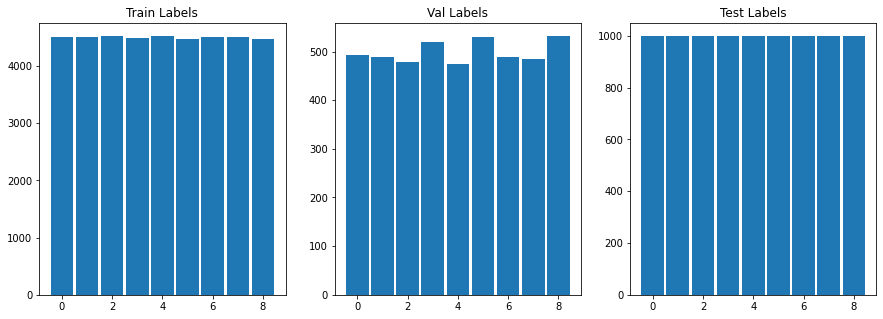

In [ ]:
plot_label_distribution(data3)

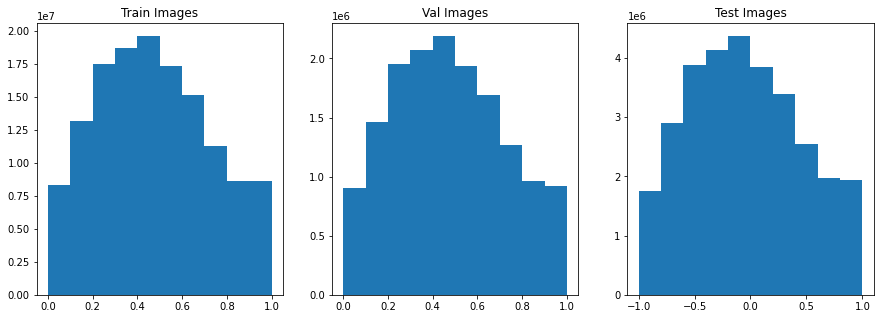

In [ ]:
plot_images_distribution(data3)

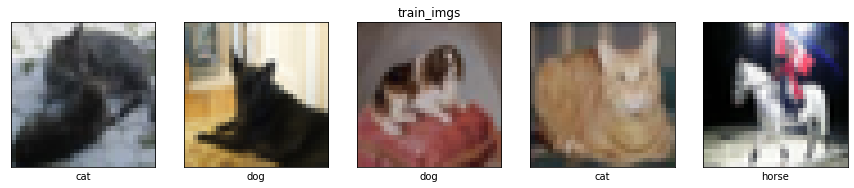

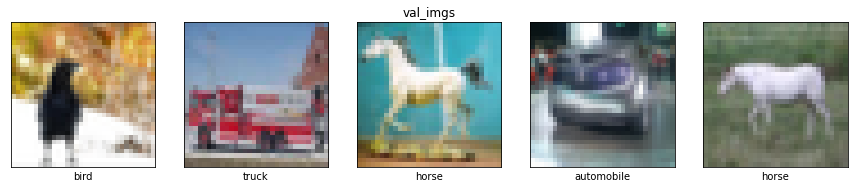

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


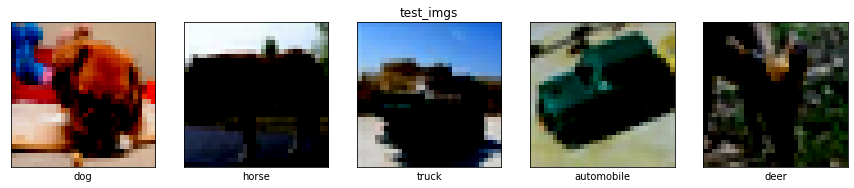

In [ ]:
print_images_with_labels(data3)

The test images have negative pixels, because of that the test accuracy is low. Train and val accuracy are usual.  
A solution could be to clip the test examples or better to find the problem at the data (generation) e.g. color values are correct, just with a wrong sign and correct it.  
This dataset represents problems, where the generation or preprocessing has errors.

## Data 4

In [ ]:
data4 = get_data(4)

In [ ]:
run_model(data4)

Epoch 1/20
704/704 [==============================] - 7s 9ms/step - loss: 0.1042 - accuracy: 0.9570 - val_loss: 4.4346e-06 - val_accuracy: 1.0000
Epoch 2/20
704/704 [==============================] - 6s 8ms/step - loss: 2.1215e-06 - accuracy: 1.0000 - val_loss: 9.2983e-07 - val_accuracy: 1.0000
Epoch 3/20
704/704 [==============================] - 6s 8ms/step - loss: 5.8405e-07 - accuracy: 1.0000 - val_loss: 3.4571e-07 - val_accuracy: 1.0000
Epoch 4/20
704/704 [==============================] - 6s 8ms/step - loss: 2.5170e-07 - accuracy: 1.0000 - val_loss: 1.5497e-07 - val_accuracy: 1.0000
Epoch 5/20
704/704 [==============================] - 6s 8ms/step - loss: 1.2614e-07 - accuracy: 1.0000 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 6/20
704/704 [==============================] - 6s 8ms/step - loss: 7.2267e-08 - accuracy: 1.0000 - val_loss: 4.7684e-08 - val_accuracy: 1.0000
Epoch 7/20
704/704 [==============================] - 6s 8ms/step - loss: 5.7226e-08 - accuracy: 1.0000 

In [ ]:
print_dataset_numbers(data4)

Train Examples: 45000
Val Examples: 5000
Test Examples: 10000
Are all 50000 train examples used? True
Were there more than 50000 train examples used? False
Are all 10000 test examples used? True
Train Split: 0.9, Val Split: 0.1


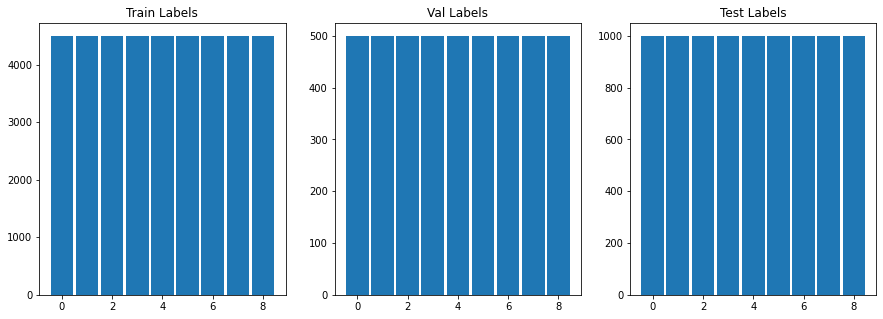

In [ ]:
plot_label_distribution(data4)

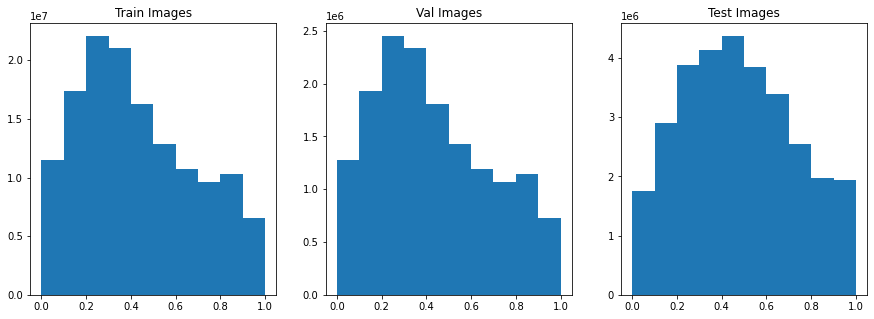

In [ ]:
plot_images_distribution(data4)

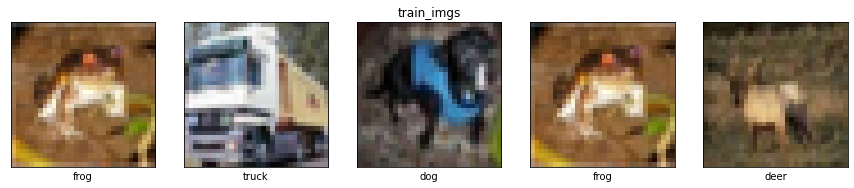

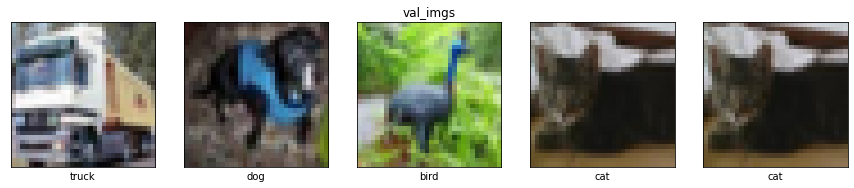

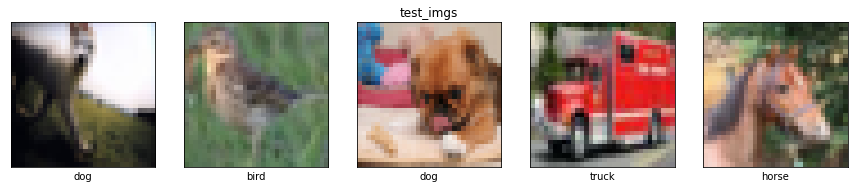

In [ ]:
print_images_with_labels(data4)

The train and val set contain few pictures very often, the model overfitts to this pictures, the train and val accuracy is early high, but the test accuracy is that of random guessing.  
The problem can be solved, by getting a train and val set without doublicates and with more examples.  
This problem represents doublicated examples at a dataset

# Practical Methodology

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

input_layer = tf.keras.Input(shape=(32, 32, 3))

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

preprocess_input = tf.keras.applications.densenet.preprocess_input

dense_net = tf.keras.applications.densenet.DenseNet121(include_top=False, weights="imagenet", input_shape=(32,32,3))
dense_net.trainabel = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

29097984/29084464 [==============================] - 1s 0us/step


In [ ]:
def model_builder(hp):
  inputs = tf.keras.Input(shape=(32, 32, 3))
  x = data_augmentation(inputs)
  x = preprocess_input(x)
  x = dense_net(x, training=False)
  x = global_average_layer(x)
  x = tf.keras.layers.Dropout(0.2)(x)

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  x = keras.layers.Dense(units=hp_units, activation='relu')(x)
  outputs = keras.layers.Dense(10)(x)

  model = tf.keras.Model(inputs, outputs)

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir2',
                     project_name='intro_to_kt2')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

INFO:tensorflow:Reloading Oracle from existing project my_dir2/intro_to_kt2/oracle.json
INFO:tensorflow:Reloading Tuner from my_dir2/intro_to_kt2/tuner0.json


In [ ]:
tuner.search(x_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 416 and the optimal learning rate for the optimizer
is 0.0001.



Took 3 hours, expensive but could be cheaper than trying hyperparameters out.

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
1250/1250 [==============================] - 111s 72ms/step - loss: 1.1445 - accuracy: 0.5950 - val_loss: 0.8335 - val_accuracy: 0.7129
Epoch 2/50
1250/1250 [==============================] - 92s 74ms/step - loss: 0.8295 - accuracy: 0.7125 - val_loss: 0.7010 - val_accuracy: 0.7536
Epoch 3/50
1250/1250 [==============================] - 86s 69ms/step - loss: 0.7405 - accuracy: 0.7467 - val_loss: 0.7167 - val_accuracy: 0.7526
Epoch 4/50
1250/1250 [==============================] - 86s 69ms/step - loss: 0.6798 - accuracy: 0.7657 - val_loss: 0.6468 - val_accuracy: 0.7771
Epoch 5/50
1250/1250 [==============================] - 89s 71ms/step - loss: 0.6262 - accuracy: 0.7829 - val_loss: 0.5605 - val_accuracy: 0.8082
Epoch 6/50
1250/1250 [==============================] - 89s 71ms/step - loss: 0.5988 - accuracy: 0.7955 - val_loss: 0.6064 - val_accuracy: 0.7943
Epoch 7/50
1250/1250 [==============================] - 89s 71ms/step - loss: 0.5585 - accuracy: 0.8054 - val_loss: 0.5578 

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(x_train, y_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/19
1250/1250 [==============================] - 99s 72ms/step - loss: 0.2131 - accuracy: 0.9329 - val_loss: 0.6611 - val_accuracy: 0.8280
Epoch 2/19
1250/1250 [==============================] - 87s 70ms/step - loss: 0.1563 - accuracy: 0.9484 - val_loss: 0.7028 - val_accuracy: 0.8309
Epoch 3/19
1250/1250 [==============================] - 83s 67ms/step - loss: 0.1506 - accuracy: 0.9505 - val_loss: 0.7206 - val_accuracy: 0.8331
Epoch 4/19
1250/1250 [==============================] - 83s 67ms/step - loss: 0.1484 - accuracy: 0.9495 - val_loss: 0.7154 - val_accuracy: 0.8262
Epoch 5/19
1250/1250 [==============================] - 88s 71ms/step - loss: 0.1424 - accuracy: 0.9521 - val_loss: 0.6565 - val_accuracy: 0.8352
Epoch 6/19
1250/1250 [==============================] - 85s 68ms/step - loss: 0.1405 - accuracy: 0.9541 - val_loss: 0.6131 - val_accuracy: 0.8438
Epoch 7/19
1250/1250 [==============================] - 88s 70ms/step - loss: 0.1342 - accuracy: 0.9551 - val_loss: 0.6856 -

In [ ]:
eval_result = hypermodel.evaluate(x_test, y_test)
print("[test loss, test accuracy]:", eval_result)

313/313 [==============================] - 7s 21ms/step - loss: 0.6927 - accuracy: 0.8288
[test loss, test accuracy]: [0.6926630735397339, 0.8288000226020813]


train accuracy is very good, val and test accuracy are worse. Adding the val set to the training set could help, since no early stopping or scheduler that uses the val accuracy is used.

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(x_train, y_train, epochs=best_epoch)
eval_result = hypermodel.evaluate(x_test, y_test)
print("[test loss, test accuracy]:", eval_result)

Epoch 1/19
1563/1563 [==============================] - 111s 65ms/step - loss: 0.2765 - accuracy: 0.9203
Epoch 2/19
1563/1563 [==============================] - 101s 65ms/step - loss: 0.2217 - accuracy: 0.9315
Epoch 3/19
1563/1563 [==============================] - 100s 64ms/step - loss: 0.2035 - accuracy: 0.9360
Epoch 4/19
1563/1563 [==============================] - 99s 64ms/step - loss: 0.1878 - accuracy: 0.9408
Epoch 5/19
1563/1563 [==============================] - 100s 64ms/step - loss: 0.1824 - accuracy: 0.9424
Epoch 6/19
1563/1563 [==============================] - 100s 64ms/step - loss: 0.1760 - accuracy: 0.9448
Epoch 7/19
1563/1563 [==============================] - 99s 64ms/step - loss: 0.1646 - accuracy: 0.9447
Epoch 8/19
1563/1563 [==============================] - 100s 64ms/step - loss: 0.1638 - accuracy: 0.9471
Epoch 9/19
1563/1563 [==============================] - 104s 67ms/step - loss: 0.1585 - accuracy: 0.9480
Epoch 10/19
1563/1563 [==============================] - 

Train accuracy is a little bit worse and the test accuracy a little bit better.  
Another dropout layer could reduce the test error more.

In [ ]:
def model_with_hp():
  inputs = tf.keras.Input(shape=(32, 32, 3))
  x = data_augmentation(inputs)
  x = preprocess_input(x)
  x = dense_net(x, training=False)
  x = global_average_layer(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  x = keras.layers.Dense(units=416, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  outputs = keras.layers.Dense(10)(x)

  model = tf.keras.Model(inputs, outputs)

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

hypermodel = model_with_hp()

# Retrain the model
hypermodel.fit(x_train, y_train, epochs=best_epoch)
eval_result = hypermodel.evaluate(x_test, y_test)
print("[test loss, test accuracy]:", eval_result)

Epoch 1/19
1563/1563 [==============================] - 113s 66ms/step - loss: 0.1887 - accuracy: 0.9445
Epoch 2/19
1563/1563 [==============================] - 103s 66ms/step - loss: 0.1446 - accuracy: 0.9552
Epoch 3/19
1563/1563 [==============================] - 102s 66ms/step - loss: 0.1341 - accuracy: 0.9574
Epoch 4/19
1563/1563 [==============================] - 101s 65ms/step - loss: 0.1259 - accuracy: 0.9593
Epoch 5/19
1563/1563 [==============================] - 101s 65ms/step - loss: 0.1272 - accuracy: 0.9590
Epoch 6/19
1563/1563 [==============================] - 100s 64ms/step - loss: 0.1222 - accuracy: 0.9609
Epoch 7/19
1563/1563 [==============================] - 103s 66ms/step - loss: 0.1215 - accuracy: 0.9608
Epoch 8/19
1563/1563 [==============================] - 100s 64ms/step - loss: 0.1218 - accuracy: 0.9605
Epoch 9/19
1563/1563 [==============================] - 100s 64ms/step - loss: 0.1177 - accuracy: 0.9622
Epoch 10/19
1563/1563 [==============================] 

Train and Test accuracy a little bit better, but not significantly.